In [1]:
import kagglehub

path = kagglehub.dataset_download("zubairamuti/shopping-behaviours-dataset")

print("Path to dataset files:", path)
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

csv_path = os.path.join(path, os.listdir(path)[0])
df = pd.read_csv(csv_path)


sns.set_theme(style='ticks')

df.head()

c:\Users\RAZER\.conda\envs\df_projects\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\RAZER\.cache\kagglehub\datasets\zubairamuti\shopping-behaviours-dataset\versions\1


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [2]:
df['Payment Method'].value_counts()

Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

In [3]:
df_payment_grpd = df.groupby('Gender').agg({
    'Purchase Amount (USD)' : 'sum',
    'Previous Purchases' : 'sum'
}).reset_index()
df_payment_grpd

,Gender,Purchase Amount (USD),Previous Purchases
0,Female,75191,30696
1,Male,157890,68175


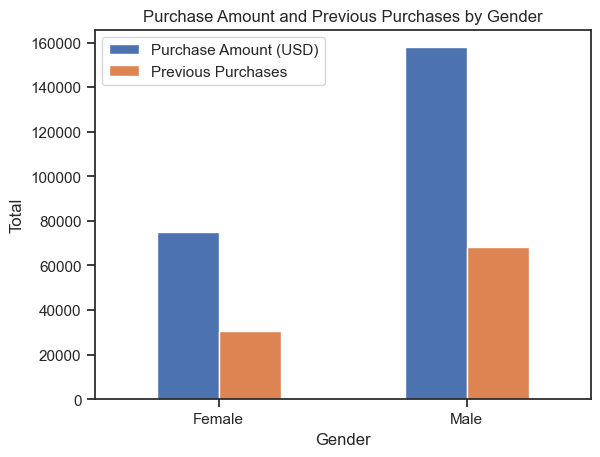

In [4]:

df_payment_grpd.set_index('Gender').plot(kind='bar')

plt.title('Purchase Amount and Previous Purchases by Gender')
plt.ylabel('Total')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()


as we can see men spend more and buy more products than women 

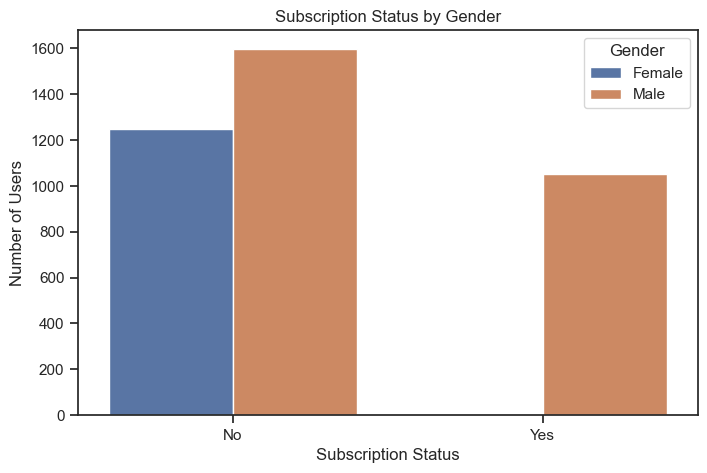

In [5]:
df_subscribed = df.pivot_table(index='Subscription Status',columns='Gender',aggfunc='size')


df_long = df_subscribed.reset_index().melt(
    id_vars='Subscription Status', var_name='Gender', value_name='Count'
)

plt.figure(figsize=(8,5))
sns.barplot(data=df_long, x='Subscription Status', y='Count', hue='Gender')
plt.title('Subscription Status by Gender')
plt.ylabel('Number of Users')
plt.show()

only males have a subscription

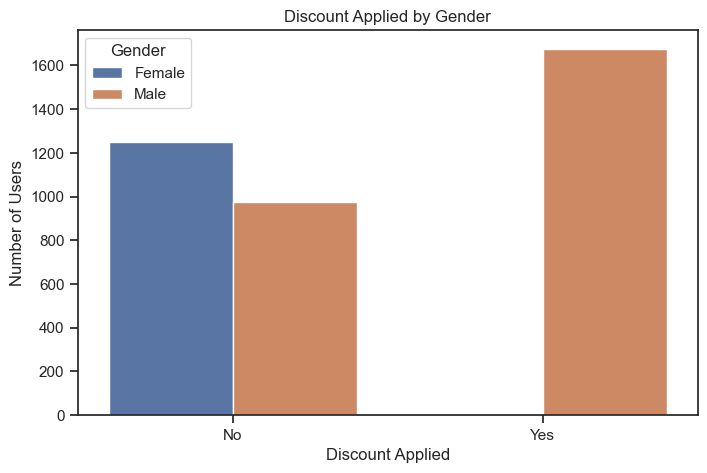

In [6]:
df_promo = df.pivot_table(index='Discount Applied',columns='Gender',aggfunc='size')


df_long = df_promo.reset_index().melt(
    id_vars='Discount Applied', var_name='Gender', value_name='Count'
)

plt.figure(figsize=(8,5))
sns.barplot(data=df_long, x='Discount Applied', y='Count', hue='Gender')
plt.title('Discount Applied by Gender')
plt.ylabel('Number of Users')
plt.show()

Discounts are only given to man

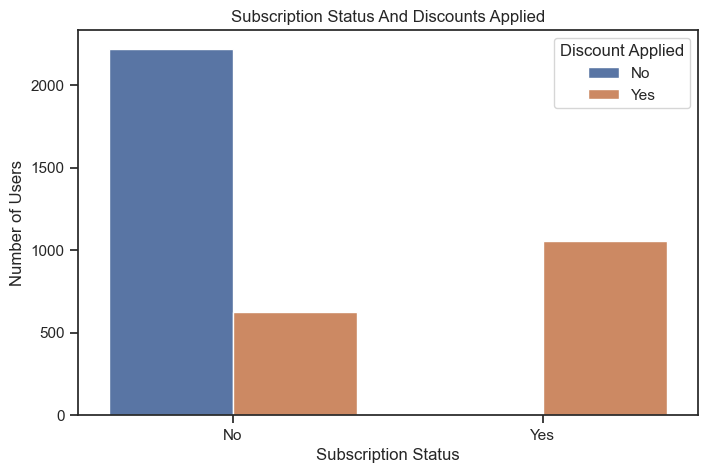

In [7]:
df_promo_subscription = df.pivot_table(index='Subscription Status',columns='Discount Applied',aggfunc='size')


df_long = df_promo_subscription.reset_index().melt(
    id_vars='Subscription Status', var_name='Discount Applied', value_name='Count'
)

plt.figure(figsize=(8,5))
sns.barplot(data=df_long, x='Subscription Status', y='Count', hue='Discount Applied')
plt.title('Subscription Status And Discounts Applied')
plt.ylabel('Number of Users')
plt.show()

every subscribed member gets a discount 

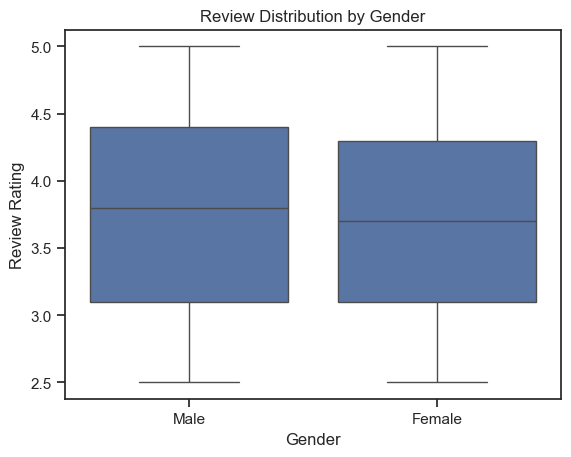

In [34]:

sns.boxplot(data=df, x='Gender',y='Review Rating')
plt.title('Review Distribution by Gender')
plt.show()